# Log templates of HDFS

In [1]:
hc = '''Adding an already existing block (.*)
(.*)Verification succeeded for (.*)
(.*) Served block (.*) to (.*)
(.*):Got exception while serving (.*) to (.*):(.*)
Receiving block (.*) src: (.*) dest: (.*)
Received block (.*) src: (.*) dest: (.*) of size ([-]?[0-9]+)
writeBlock (.*) received exception (.*)
PacketResponder ([-]?[0-9]+) for block (.*) Interrupted\.
Received block (.*) of size ([-]?[0-9]+) from (.*)
PacketResponder (.*) ([-]?[0-9]+) Exception (.*)
PacketResponder ([-]?[0-9]+) for block (.*) terminating
(.*):Exception writing block (.*) to mirror (.*)(.*)
Receiving empty packet for block (.*)
Exception in receiveBlock for block (.*) (.*)
Changing block file offset of block (.*) from ([-]?[0-9]+) to ([-]?[0-9]+) meta file offset to ([-]?[0-9]+)
(.*):Transmitted block (.*) to (.*)
(.*):Failed to transfer (.*) to (.*) got (.*)
(.*) Starting thread to transfer block (.*) to (.*)
Reopen Block (.*)
Unexpected error trying to delete block (.*)\. BlockInfo not found in volumeMap\.
Deleting block (.*) file (.*)
BLOCK\* NameSystem\.allocateBlock: (.*)\. (.*)
BLOCK\* NameSystem\.delete: (.*) is added to invalidSet of (.*)
BLOCK\* Removing block (.*) from neededReplications as it does not belong to any file\.
BLOCK\* ask (.*) to replicate (.*) to (.*)
BLOCK\* NameSystem\.addStoredBlock: blockMap updated: (.*) is added to (.*) size ([-]?[0-9]+)
BLOCK\* NameSystem\.addStoredBlock: Redundant addStoredBlock request received for (.*) on (.*) size ([-]?[0-9]+)
BLOCK\* NameSystem\.addStoredBlock: addStoredBlock request received for (.*) on (.*) size ([-]?[0-9]+) But it does not belong to any file\.
PendingReplicationMonitor timed out block (.*)
(.*): java.io.IOException: Block (.*) is valid, and cannot be written to.
BLOCK\* ask (.*) to delete (.*)
Moved block (.*) from (.*)
Copied block (.*) to (.*)
(.*): java.io.IOException: Block (.*) is not valid.
Got exception while serving (.*) to (.*)'''

# Features

In [7]:
import json
import pickle
FEATURE_SIZE = 6
#level, middle, context_after, context_before, scope, sentiment
with open("features.pkl", 'rb') as f:
    features = pickle.load(f)

# Pre-analysis

In [6]:
index = 0
index2text = {}
f = hc.split("\n")
for line in f:
    index2text[index] = line.strip()
    index += 1
        
def scrub(line):
    line = line.replace("(.*)", "")
    line = line.replace(":","")
    line = line.replace(" ([-]?[0-9]+)", "")
    line = line.replace("\\*", "")
    line = line.replace("\\.", "")
    line = line.lower()
    line = line.strip()
    return line
for index in index2text:
    index2text[index] = scrub(index2text[index])
word2index = {}
index = 0
for text in index2text.values():   
    for word in text.split():
        if word not in word2index:
            word2index[word] = index
            index += 1
print(word2index)

{'adding': 0, 'an': 1, 'already': 2, 'existing': 3, 'block': 4, 'verification': 5, 'succeeded': 6, 'for': 7, 'served': 8, 'to': 9, 'got': 10, 'exception': 11, 'while': 12, 'serving': 13, 'receiving': 14, 'src': 15, 'dest': 16, 'received': 17, 'of': 18, 'size': 19, 'writeblock': 20, 'packetresponder': 21, 'interrupted': 22, 'from': 23, 'terminating': 24, 'writing': 25, 'mirror': 26, 'empty': 27, 'packet': 28, 'in': 29, 'receiveblock': 30, 'changing': 31, 'file': 32, 'offset': 33, 'meta': 34, 'transmitted': 35, 'failed': 36, 'transfer': 37, 'starting': 38, 'thread': 39, 'reopen': 40, 'unexpected': 41, 'error': 42, 'trying': 43, 'delete': 44, 'blockinfo': 45, 'not': 46, 'found': 47, 'volumemap': 48, 'deleting': 49, 'namesystemallocateblock': 50, 'namesystemdelete': 51, 'is': 52, 'added': 53, 'invalidset': 54, 'removing': 55, 'neededreplications': 56, 'as': 57, 'it': 58, 'does': 59, 'belong': 60, 'any': 61, 'ask': 62, 'replicate': 63, 'namesystemaddstoredblock': 64, 'blockmap': 65, 'update

In [8]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=12, random_state=1).fit_predict(features)
index2pred = {index+1:i for index, i in enumerate(y_pred)}
print(index2pred)
reverse_i2p = [[] for _ in range(12)]
for k, v in index2pred.items():
    reverse_i2p[v].append(k)
for index, i in enumerate(reverse_i2p):
    print(index, i)
print([i for i in index2pred if index2pred[i]>=1])

{1: 11, 2: 10, 3: 8, 4: 6, 5: 0, 6: 5, 7: 2, 8: 7, 9: 5, 10: 7, 11: 0, 12: 7, 13: 4, 14: 2, 15: 5, 16: 8, 17: 6, 18: 5, 19: 9, 20: 1, 21: 0, 22: 0, 23: 3, 24: 4, 25: 3, 26: 3, 27: 1, 28: 4, 29: 1, 30: 1, 31: 4, 32: 3, 33: 3, 34: 1, 35: 1}
0 [5, 11, 21, 22]
1 [20, 27, 29, 30, 34, 35]
2 [7, 14]
3 [23, 25, 26, 32, 33]
4 [13, 24, 28, 31]
5 [6, 9, 15, 18]
6 [4, 17]
7 [8, 10, 12]
8 [3, 16]
9 [19]
10 [2]
11 [1]
[1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


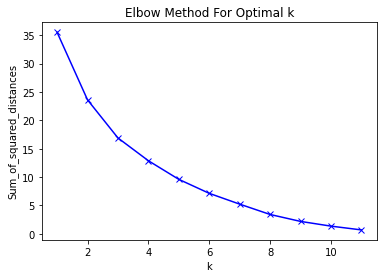

In [12]:
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k, random_state=1)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Data Initialize

In [13]:
nm = []
ab = []
# repeat times
nm_rp = []
ab_rp = []
with open("deeplog_data/hdfs_test_normal") as f:
    for line in f:
        nm.append([int(i) for i in line.strip().split()])
with open("deeplog_data/hdfs_test_abnormal") as f:
    for line in f:
        ab.append([int(i) for i in line.strip().split()])
with open("deeplog_data/hdfs_test_normal_repeats") as f:
    for line in f:
        nm_rp.append(int(line.strip()))
with open("deeplog_data/hdfs_test_abnormal_repeats") as f:
    for line in f:
        ab_rp.append(int(line.strip()))
print(len(nm))
print(len(ab))
y = [0]*len(nm)+[1]*len(ab)
y_rp = nm_rp + ab_rp

553366
16838


# Training/Test data preparation

In [14]:
import os
import torch
from torch import nn
from d2l import torch as d2l
from collections import *
num_steps = 30
batch_size = 64

def read_data(normal_logs, abnormal_logs, train=True):
    data, labels = [], []
    rep = 1
    indices = set()
    for filepath in normal_logs:
        with open(filepath) as fp:
            for line in fp:
                content = line.replace('\n', '')
                for _ in range(rep):
                    data.append(content)
                    labels.append(0)
        
    for filepath in abnormal_logs:
        with open(filepath) as fp:
            for line in fp:
                content = line.replace('\n', '')
                for _ in range(rep):
                    data.append(content)
                    labels.append(1)
    if train:
        length = len(data)
        new_data, new_labels = [], []
        for i, l in zip(data, labels):
            # Partial training data to simulate severe real-world settings.
            if all(int(j) in [3, 4, 5, 8, 9, 11, 12, 13, 14, 15, 18, 19,27, 21, 22, 23, 26] for j in i.split()):
                new_data.append(i)
                new_labels.append(l)
        new_data2, new_labels2 = [], []
        for i, l in zip(new_data, new_labels):
            if l == 1:
                new_data2.extend([i]*20)
                new_labels2.extend([l]*20)
            else:
                new_data2.append(i)
                new_labels2.append(l)
        new_data, new_labels = new_data2, new_labels2
        data, labels = new_data, new_labels
        s = set()
        
    for i in data:    
        indices |= set(int(j) for j in i.split())
    return data, labels


def my_tokenize(data):
    each = [line.split() for line in data]
    return [[features[int(j)-1] for j in i] for i in each]

def get_words(lines):
    s = []
    for line in lines:
        for word in line:
            s.append(word)
    return s

def word_bag(index):
    a = [0]*(len(word2index))
    text = index2text[index].split()
    for word in text:
        a[word2index[word]] += 1
    return a
train_data = read_data(["./deeplog_data/hdfs_train"],["./deeplog_data/hdfs_train_ab"])


test_data = read_data(["./deeplog_data/hdfs_test_normal_uniq"],["./deeplog_data/hdfs_test_abnormal_uniq"], train=False)
#test_data = read_data(["new_unseen_logs_normal2","hdfs_normal_16k"],["new_unseen_logs_abnormal2"], train=False)

print(train_data[1].count(0), train_data[1].count(1))
print(test_data[1].count(0), test_data[1].count(1))
print(len(train_data[0]))
train_tokens = my_tokenize(train_data[0])
test_tokens = my_tokenize(test_data[0])

vocab = d2l.Vocab(get_words(train_tokens), min_freq=1, reserved_tokens=['<pad>'])
train_features = torch.tensor([
        d2l.truncate_pad(line, num_steps, [-1]*(FEATURE_SIZE))
        for line in train_tokens], dtype=torch.float32)
test_features = torch.tensor([
        d2l.truncate_pad(line, num_steps, [-1]*(FEATURE_SIZE))
        for line in test_tokens], dtype=torch.float32)

train_iter = d2l.load_array((train_features, torch.tensor(train_data[1])),
                                batch_size)
test_iter = d2l.load_array((test_features, torch.tensor(test_data[1])),
                               batch_size, is_train=False)

4119 2880
14177 4123
6999


# Initialize Neural Net

In [15]:
class BiRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers,
                 **kwargs):
        super(BiRNN, self).__init__(**kwargs)
        self.embedding = nn.Linear(FEATURE_SIZE, embed_size)

        self.encoder = nn.LSTM(embed_size, num_hiddens, num_layers=num_layers,
                               bidirectional=True)
        self.decoder = nn.Linear(4 * num_hiddens, 2)

    def forward(self, inputs):
        embeddings = self.embedding(inputs[:,:,:FEATURE_SIZE])
        embeddings = torch.transpose(embeddings, 0, 1)

        outputs, _ = self.encoder(embeddings)

        encoding = torch.cat((outputs[0], outputs[-1]), dim=1)
        outs = self.decoder(encoding)
        return outs

embed_size, num_hiddens, num_layers, devices = 20, 20, 2, d2l.try_all_gpus()
net = BiRNN(0, embed_size, num_hiddens, num_layers)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
    if type(m) == nn.LSTM:
        for param in m._flat_weights_names:
            if "weight" in param:
                nn.init.xavier_uniform_(m._parameters[param])

net.apply(init_weights)

BiRNN(
  (embedding): Linear(in_features=6, out_features=20, bias=True)
  (encoder): LSTM(20, 20, num_layers=2, bidirectional=True)
  (decoder): Linear(in_features=80, out_features=2, bias=True)
)

# Training

loss 0.024, train acc 0.994, test acc 0.813
1713.4 examples/sec on [device(type='cpu')]


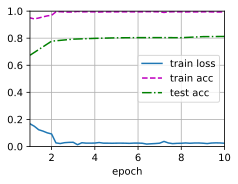

In [17]:
lr, num_epochs = 0.01, 10
trainer = torch.optim.Adam(net.parameters(), lr=lr)
loss = nn.CrossEntropyLoss(reduction="none")
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)


# Testing

In [45]:
import time
test_tokens = my_tokenize(test_data[0])
def test(name, data_for_test):
    right = 0
    TruePositives = 0
    FalsePositives = 0
    FalseNegatives = 0
    TrueNegatives = 0
    total = 0
    print("start")
    predicts = []
    total_time = 0
    ts = []
    for i in range(0, len(data_for_test[0])):
        text = test_tokens[i]
        rp = y_rp[i]
        label = data_for_test[1][i]
        total += rp
        if total % 10000 == 0:
            print("....handle", total, "lines already...")
        t = torch.tensor(d2l.truncate_pad(text, num_steps, [-1]*(FEATURE_SIZE)), device=d2l.try_gpu(),dtype=torch.float32)
        l = torch.argmax(net(t.reshape(1,30,-1)), dim=1)
        l = l.item()
        predicts.append(l)
    return predicts


predicts = test("hdfs", test_data)
print("done")

start
....handle 250000 lines already...
done


In [47]:
def calc_acc(predicts):
    right = 0
    TruePositives = 0
    FalsePositives = 0
    FalseNegatives = 0
    TrueNegatives = 0
    total = 0
    for i in range(0, len(test_data[0])):
        text = test_tokens[i]
        rp = y_rp[i]
        label = test_data[1][i]
        total += rp
        l = predicts[i]
        if l == 1 and label == 1:
            TruePositives += rp
            #print("TruePositives", text, label, l)
        if l == 1 and label == 0:
            FalsePositives += rp
#             print("FalsePositives", text, label, l)
        if l == 0 and label == 1:
            FalseNegatives += rp
#             print("FalseNegatives", text, label, l)
        if l == 0 and label == 0:
            TrueNegatives += rp
        
        if l == label:
            right += rp

    precision = (TruePositives)/(TruePositives+FalsePositives)
    recall = (TruePositives)/(TruePositives+FalseNegatives)
    f = (2 * precision * recall) / (precision + recall)
    print (right, total, "Accuracy:{:.2%}, Precision:{:.2%}, Recall:{:.2%}, F-Measure: {:.2%}".format((right)/(total), precision, recall, f))
calc_acc(predicts)

564530 570204 Accuracy:99.00%, Precision:98.99%, Recall:66.99%, F-Measure: 79.90%


Accuracy: 98.39%
Precision: 99.96%
Recall: 45.59%
F-measure: 62.62%


[Text(133.92000000000002, 190.26, 'X[8] <= 1.5\ngini = 0.484\nsamples = 6999\nvalue = [4119, 2880]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 2540\nvalue = [0, 2540]'),
 Text(200.88000000000002, 135.9, 'X[26] <= 0.5\ngini = 0.141\nsamples = 4459\nvalue = [4119, 340]'),
 Text(133.92000000000002, 81.53999999999999, 'X[12] <= 1.5\ngini = 0.046\nsamples = 4219\nvalue = [4119, 100]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 4119\nvalue = [4119, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 100\nvalue = [0, 100]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 240\nvalue = [0, 240]')]

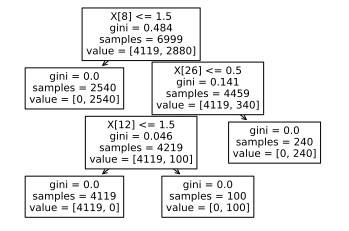

In [41]:
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def data2features(data):
    features = []
    for line in data:
        f = [0]*35
        for index in line.split():
            f[int(index)-1] += 1
        features.append(f)
    return features
train_features = data2features(train_data[0])
test_features = data2features(test_data[0])
clf = tree.DecisionTreeClassifier()
clf.fit(train_features, train_data[1])
y_pred = clf.predict(test_features)
z = precision_recall_fscore_support(test_data[1], y_pred, average="binary", sample_weight=y_rp)
print("Accuracy:", "{:.2%}".format(accuracy_score(test_data[1], y_pred, sample_weight=y_rp)))
met = ["Precision", "Recall", "F-measure"]
for index in range(3):
    print(met[index]+":", "{:.2%}".format(z[index]))
tree.plot_tree(clf)

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def data2features(data):
    features = []
    for line in data:
        f = [0]*35
        for index in line.split():
            f[int(index)-1] += 1
        features.append(f)
    return features
train_features = data2features(train_data[0])
test_features = data2features(test_data[0])
clf = SVC(gamma=2, C=1)
clf.fit(train_features, train_data[1])
y_pred = clf.predict(test_features)
z = precision_recall_fscore_support(test_data[1], y_pred, average="binary", sample_weight=y_rp)
print("Accuracy:", "{:.2%}".format(accuracy_score(test_data[1], y_pred, sample_weight=y_rp)))
met = ["Precision", "Recall", "F-measure"]
for index in range(3):
    print(met[index]+":", "{:.2%}".format(z[index]))

Accuracy: 98.30%
Precision: 100.00%
Recall: 42.53%
F-measure: 59.68%
